## [Password and hijacked email dataset for you to test your data science skills](http://www.datasciencecentral.com/forum/topics/password-dataset-for-you-to-test-your-data-science-skills)

### Anyway, the reason for sharing the password data set with you is for you to test your data science skills: try to answer the following questions:

- What are the most common patterns found in passwords?
- Based on these patterns, how to build robust yet easy-to-remember passwords?
- Does this password data set look OK, or do you think it is somewhat inaccurate or not representative of the password universe? If not, can we still draw valid conclusions from this data set, and how?

Data is available [here](http://www.dazzlepod.com/site_media/txt/passwords.txt)

In [70]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [58]:
import urllib2

url= 'http://www.dazzlepod.com/site_media/txt/passwords.txt'
response = urllib2.urlopen(url)
print response.info()

Server: nginx
Date: Sun, 20 Nov 2016 03:18:32 GMT
Content-Type: text/plain; charset=utf-8
Content-Length: 20163399
Last-Modified: Sun, 27 Mar 2016 05:04:06 GMT
Connection: close
Vary: Accept-Encoding
ETag: "56f769c6-133ab47"
Expires: Sun, 27 Nov 2016 03:18:32 GMT
Cache-Control: max-age=604800
Accept-Ranges: bytes



In [59]:
# save into file
rawfile = open('passwords.txt', 'r+')
rawfile.truncate()
for line in response.read():
    rawfile.write(line)
rawfile.close()   

In [61]:
fh = open('passwords.txt', 'r+')

for line in fh.readlines()[:20]:
    print line    

#

# This is a list of 2,151,220 unique ASCII passwords in sorted order according

# to their native byte values using UNIX sort command.

#

# This list (also known as wordlist, password dictionary or password list)

# is useful for password recovery tools such as John the Ripper, oclHashcat

# and Aircrack-ng. To use this file, be sure to first remove these comment

# lines, i.e. the lines starting with # character.

#

# If you are looking for a better password dictionary,

# see http://dazzlepod.com/uniqpass/

#

# $DateTime: 2016/03/27 16:04:06 $

#

# Comments/Questions? Send to disclosure@dazzlepod.com

#

!

! love you

!!

!!!



In [62]:
# to get help pd.read_csv?
passwords = pd.read_csv('passwords.txt',header=None, skiprows=16, names=['password'])  #

In [63]:
passwords.head(5)

,password
0,!
1,! love you
2,!!
3,!!!
4,!!!!!


In [64]:
passwords.tail(5)

,password
2151200,~~sstux
2151201,~~zhou075278
2151202,~~~~
2151203,~~~~~
2151204,~~~~~~


In [65]:
passwords.shape

(2151205, 1)

In [305]:
# check how many unique passwords
uniq_passwords = passwords.password.unique()
uniq_passwords.shape

(2150218L,)

## Data Preprocess

In [299]:
# define some helper functions

import re
def hasLetters(x):
    return any(re.match('[a-zA-Z]', char) for char in str(x))

def hasCapLetters(x):
    return any(re.match('[A-Z]', char) for char in str(x))

def hasNumbers(x):
    return any(char.isdigit() for char in str(x)) 

def hasSymbols(x):
    sym = set('~!@#$%^&*(){}:;,"=<>\/')
    return any((c in sym) for c in str(x))

In [300]:
# add more columns

passwords['hasLetters'] = passwords.password.map(lambda x: hasLetters(x))
passwords['hasCapLetters'] = passwords.password.map(lambda x: hasCapLetters(x))
passwords['hasNumbers'] = passwords.password.map(lambda x: hasNumbers(x))
passwords['hasSymbols'] = passwords.password.map(lambda x: hasSymbols(x))
passwords['length'] = passwords.password.map(lambda x: len(str(x)))

In [301]:
# check how the data look now
passwords.head(5)

,password,length,hasLetters,hasNumbers,hasSymbols,hasCapLetters
0,!,1,False,False,True,False
1,! love you,10,True,False,True,False
2,!!,2,False,False,True,False
3,!!!,3,False,False,True,False
4,!!!!!,5,False,False,True,False


## Analysis the length of passwords

In [302]:
# check minimal length
passwords['length'].min()

1

In [303]:
# check maximal length
passwords['length'].max()

35

In [319]:
# check the longest password
passwords[passwords['length'] == 35]

,password,length,hasLetters,hasNumbers,hasSymbols,hasCapLetters
1029,==)!)(=\r\n><script>alert(1)</script>,35,True,True,True,False


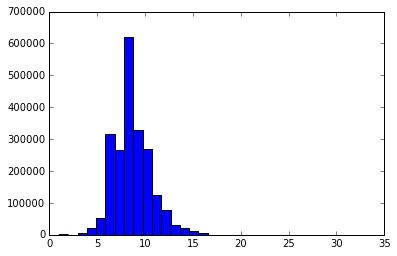

In [306]:
# check the length distribution
plt.hist(passwords.length, bins=35)
plt.show()

### Analysis the Composition of Passwords

In [331]:
# check what percent password has number

total_rec = passwords.shape[0]
pct_number = passwords[passwords['hasNumbers']==True].shape[0] / float(total_rec) * 100
print "{:.2f} percent of password has number".format(pct_number)

72.81 percent of password has number


In [332]:
# check what percent password has letter

pct_letter = passwords[passwords['hasLetters']==True].shape[0] / float(total_rec) * 100
print "{:.2f} percent of password has letter".format(pct_letter)

76.44 percent of password has letter


In [333]:
# check what percent password has capital letter

pct_capletter = passwords[passwords['hasCapLetters']==True].shape[0] / float(total_rec) * 100
print "{:.2f} percent of password has capital letter".format(pct_capletter)

9.53 percent of password has capital letter


In [334]:
# check what percent password has symbol

pct_symbol = passwords[passwords['hasSymbols']==True].shape[0] / float(total_rec) * 100
print "{:.2f} percent of password has symbol".format(pct_symbol)

1.61 percent of password has symbol


In [335]:
# check what percent password has number only

pct_numonly = passwords[(passwords['hasLetters']==False)& (passwords['hasSymbols']==False)].shape[0] / float(total_rec) * 100
print "{:.2f} percent of password has number only".format(pct_numonly)

23.42 percent of password has number only


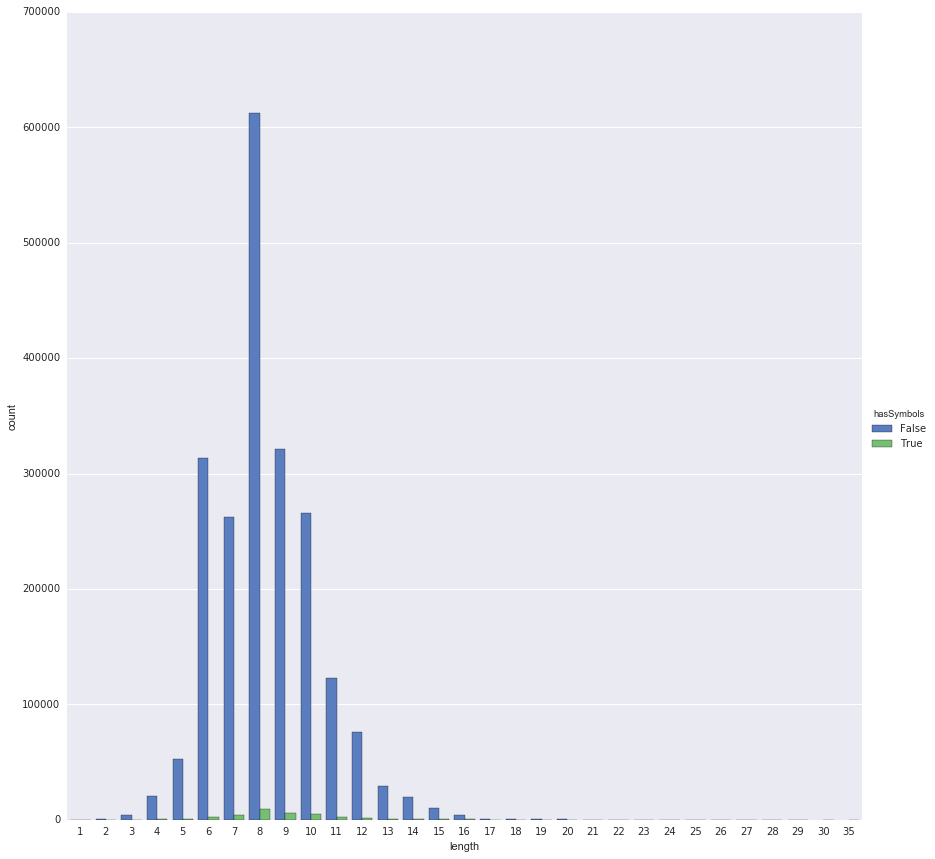

In [349]:
from matplotlib import pyplot as plt

%matplotlib inline

# Explore the number of past class failures and extra paid classes within the course subject 

sns.factorplot("length", data= passwords, hue="hasSymbols", #legend_out = False, 
               kind="count",orient='h', size = 12, palette="muted");

## Detailed Composition of Each Password

In [451]:
def pct_letter(x):
    
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if re.match('[a-zA-Z]', char):
            p += 1
    return round(p / l * 100,2)   

def pct_number(x):
    
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if str(char).isdigit():
            p += 1
    return round(p / l * 100,2)  

def pct_symbol(x):
    sym = set('~!@#$%^&*(){}:.[]`;,"=<>\\/_ ?+-|\'')
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if char in sym:
            p += 1
    return round(p / l * 100,2)  

In [452]:
passwords['pctLetters'] = passwords.password.map(lambda x: pct_letter(x))
passwords['pctSymbols'] = passwords.password.map(lambda x: pct_symbol(x))
passwords['pctNumbers'] = passwords.password.map(lambda x: pct_number(x))

In [453]:
passwords.head(5)

,password,length,hasLetters,hasNumbers,hasSymbols,hasCapLetters,pctLetters,pctSymbols,pctNumbers
0,!,1,False,False,True,False,0.0,100.0,0.0
1,! love you,10,True,False,True,False,70.0,30.0,0.0
2,!!,2,False,False,True,False,0.0,100.0,0.0
3,!!!,3,False,False,True,False,0.0,100.0,0.0
4,!!!!!,5,False,False,True,False,0.0,100.0,0.0


In [458]:
passwords.describe()

,length,pctLetters,pctSymbols,pctNumbers
count,2.151205e+06,2.151205e+06,2.151205e+06,2.151205e+06
mean,8.370621e+00,5.631594e+01,4.991009e-01,4.318488e+01
std,1.997514e+00,3.848226e+01,3.490159e+00,3.856365e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,1.429000e+01,0.000000e+00,0.000000e+00
50%,8.000000e+00,6.667000e+01,0.000000e+00,3.333000e+01
75%,1.000000e+01,1.000000e+02,0.000000e+00,8.333000e+01
max,3.500000e+01,1.000000e+02,1.000000e+02,1.000000e+02


In [449]:
s = '~\\/_?+-|\''
s

"~\\/_?+-|'"

In [450]:
len(s)

9

In [ ]:

def helper(x):
    x = list(str(x))
    for i in x:
        if i in ['0123456789']:
            return '0'
        elif i in ['abc']:
            
        

In [103]:
# filter out some passwords with rear unusuall length
ps = passwords[(passwords['length'] > 3) & (passwords['length'] < 15)]
ps.shape

(2128555, 2)

In [224]:


print re.search("c", "abcdef")

In [350]:
df = passwords[passwords['length'] ==6].head(100)

In [352]:
df.head(4)


,password,length,hasLetters,hasNumbers,hasSymbols,hasCapLetters
5,!!!!!!,6,False,False,True,False
11,!!!!!2,6,False,True,True,False
13,!!!123,6,False,True,True,False
23,!!!@9Q,6,True,True,True,True


In [371]:
s = 'abcdee$H23'
pct_letter(s)

70.0

In [372]:
pct_number(s)

20.0

In [373]:
pct_symbol(s)

10.0

In [ ]:
def hasLetters(x):
    return any(re.match('[a-zA-Z]', char) for char in str(x))

def hasCapLetters(x):
    return any(re.match('[A-Z]', char) for char in str(x))

def hasNumbers(x):
    return any(char.isdigit() for char in str(x)) 

def hasSymbols(x):
    sym = set('~!@#$%^&*(){}:;,"=<>\/')
    return any((c in sym) for c in str(x))

In [261]:
df2 = pd.DataFrame(df.password.map(lambda x: hasNumbers(x)))
df2.head(2)

,password
5,False
11,True


In [273]:
df3 = pd.DataFrame(df.password.map(lambda x: hasSymbols(x)))
df3.head(2)

,password
5,True
11,True


In [18]:
s = pd.Series(['A', 'B','a','a','a','A'])
s

0    A
1    B
2    a
3    a
4    a
5    A
dtype: object

In [21]:
fh = open('passwords.txt', 'r', skip=n)

In [19]:
s.unique()

array(['A', 'B', 'a'], dtype=object)